[[0.35150567 0.29062808]
 [1.93493922 4.52920098]
 [2.0589148  3.70432682]
 [3.75687702 5.44053047]]


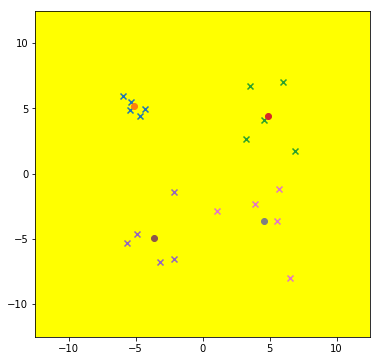

In [27]:
import matplotlib.pyplot as plt                 #加载matplotlib用于数据的可视化
import numpy as np


def display(data):
  '''data should be a list:[array, array...]'''
  proto = np.mean(data, axis=1)
  temp_x = np.linspace(minimum * 2.5, maximum * 2.5, grain_size)
  temp_y = np.zeros(shape=(grain_size)) + 12.5
  plt.fill_between(temp_x, temp_y, -temp_y, facecolor="yellow")
  for i, martiex in enumerate(data):
    plt.scatter(martiex[:, 0],martiex[:, 1],marker='x')
    plt.scatter(proto[i][0], proto[i][1], marker="o")
  plt.show()
  return


shot_num = 5
minimum = -5
maximum = 5
grain_size = 100
# 设置x，y轴的取值范围
plt.figure(figsize=(6, 6))
plt.xlim(minimum * 2.5, maximum * 2.5)
plt.ylim(minimum * 2.5, maximum * 2.5)

means = np.array([[minimum, maximum],
          [maximum, maximum],
          [minimum, minimum], 
          [maximum, minimum]])

base_cov = np.array([[0.5, 0], [0, 0.5]])

covs = np.array([base_cov * i * i for i in range(1, 5)])
# print(covs)
way_num = len(means)

data = np.zeros(shape=(way_num, shot_num, 2))
for i in range(way_num):
  data[i] = np.random.multivariate_normal(mean=means[i], cov=covs[i], size=(shot_num,))
proto = np.mean(data, axis=1)
variance = np.var(data, axis=1)
print(variance)
display(data)

In [28]:
grain_size = 400
shot_num = 5
x = np.linspace(minimum * 2.5, maximum * 2.5, grain_size)
y = np.zeros(grain_size) + x
dots = np.zeros(shape=(grain_size, grain_size, 3))
dots[:, :, 0] = [ np.zeros(grain_size) + num for num in x]
dots[:, :, 1] = y

In [29]:
data = np.zeros(shape=(way_num, shot_num, 2))
for i in range(way_num):
  data[i] = np.random.multivariate_normal(mean=means[i], cov=covs[i], size=(shot_num,))
proto = np.mean(data, axis=1)

distance_array = np.zeros(shape=(grain_size, grain_size, way_num))
for i in range(way_num):
    distance_array[:, :, i] = np.linalg.norm(dots[:, :, :2] - proto[i], axis=2)
    dots[:, :, 2] = np.argmin(distance_array, axis=2)
# print(dots[0, 0], proto[0], distance_array[0, 0, 0], np.linalg.norm(dots[0, 0, :2]-proto[0]) )

(39471, 3)
(37668, 3)
(41490, 3)
(41371, 3)


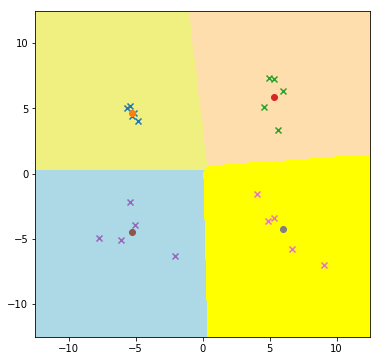

In [30]:
plt.figure(figsize=(6, 6))
plt.xlim(minimum * 2.5, maximum * 2.5)
plt.ylim(minimum * 2.5, maximum * 2.5)

# color url:https://www.cnblogs.com/qianblue/p/10783261.html
fill_colors = ["#F0f080", "#FFDEAD", "#ADD8E6", "#ffff00"]
dots_list = dots.reshape((grain_size * grain_size, 3))
for i in range(way_num):
    martiex = np.array([dot for dot in dots_list if dot[2] == i])
    print(martiex.shape)
    plt.scatter(martiex[:, 0],martiex[:, 1],c=fill_colors[i])
for i, martiex in enumerate(data):
    plt.scatter(martiex[:, 0],martiex[:, 1],marker='x')
    plt.scatter(proto[i][0], proto[i][1], marker="o")
plt.show()

In [31]:
def softmax(x):
    exp_x = np.exp(x)
    softmax_x = exp_x / np.sum(exp_x, axis=0)
    return softmax_x

variance = np.var(data, axis=1)
print(variance)
weight, bias = -0.1, 0.05
variance = variance * weight + bias
print(variance)
softmax_var = softmax(variance)
softmax_var = softmax_var * way_num
softmax_var = np.mean(softmax_var, axis=1)
print(softmax_var)
'''
temp = dots[0, 0, :2] - proto[0]
print(temp, temp * softmax_var[0])
'''
amend_distance = np.zeros(shape=(grain_size, grain_size, way_num))
for i in range(way_num):
    amend_distance[:, :, i] = np.linalg.norm((dots[:, :, :2] - proto[i]) * softmax_var[i], axis=2)
    dots[:, :, 2] = np.argmin(amend_distance, axis=2)

[[0.07513912 0.16489321]
 [0.2518174  2.18387996]
 [3.43794475 1.86185155]
 [3.00525233 3.6398291 ]]
[[ 0.04248609  0.03351068]
 [ 0.02481826 -0.168388  ]
 [-0.29379448 -0.13618515]
 [-0.25052523 -0.31398291]]
[1.17480421 1.05605245 0.91621641 0.85292693]


(34961, 3)
(36321, 3)
(43617, 3)
(45101, 3)


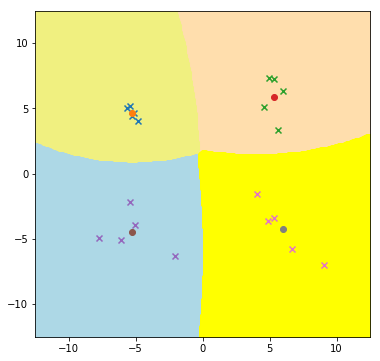

In [32]:
plt.figure(figsize=(6, 6))
plt.xlim(minimum * 2.5, maximum * 2.5)
plt.ylim(minimum * 2.5, maximum * 2.5)

# color url:https://www.cnblogs.com/qianblue/p/10783261.html
fill_colors = ["#F0f080", "#FFDEAD", "#ADD8E6", "#ffff00"]
dots_list = dots.reshape((grain_size * grain_size, 3))
for i in range(way_num):
    martiex = np.array([dot for dot in dots_list if dot[2] == i])
    print(martiex.shape)
    plt.scatter(martiex[:, 0],martiex[:, 1],c=fill_colors[i])
for i, martiex in enumerate(data):
    plt.scatter(martiex[:, 0],martiex[:, 1],marker='x')
    plt.scatter(proto[i][0], proto[i][1], marker="o")
plt.show()